<a href="https://colab.research.google.com/github/yash-3/machine-learning/blob/main/Hierarchical_Clustering_on_Cricket_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task:** Perform Hierarchical Clustering over Cricket dataset and compare with K-Means results..

In [1]:
import numpy as np      #To Prform Numerical Operation
import matplotlib.pyplot as plt   #plot something 
import pandas as pd     #To Play With Dataset

In [2]:
from google.colab import drive  #import gogle drive data

In [3]:
drive.mount('/content/drive') # mount drive data into colab cloud and enter authentication code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Dataset Files"  

/content/drive/My Drive/Colab Notebooks/Dataset Files


In [5]:
dataset=pd.read_csv("most_runs_average_strikerate.csv")
print(dataset.head())
dataset.shape

     batsman  total_runs  out  numberofballs    average  strikerate
0    V Kohli        5426  152           4111  35.697368  131.987351
1   SK Raina        5386  160           3916  33.662500  137.538304
2  RG Sharma        4902  161           3742  30.447205  130.999466
3  DA Warner        4717  114           3292  41.377193  143.286756
4   S Dhawan        4601  137           3665  33.583942  125.538881


(516, 6)

In [6]:
# Remove null values from dataset
dataset= dataset.dropna()

In [7]:
# select Total_runs and Average from given features
X= dataset.iloc[:,[1,4]].values
X.shape

(482, 2)

**Implement Hierarchical Clustering**

In [8]:
import scipy.cluster.hierarchy as sch

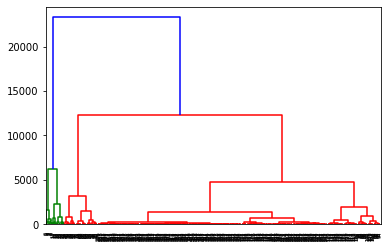

In [9]:
# create dendrogram 
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))

In [10]:
# Bottom to Top Approach in AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

In [11]:
hc = AgglomerativeClustering(distance_threshold=None,n_clusters=4,affinity='euclidean',linkage='ward')

In [12]:
y_hc = hc.fit_predict(X)

In [13]:
y_hc

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

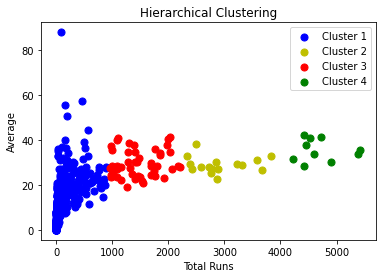

In [14]:
# visualize the cluster
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=50,c='blue',label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=50,c='y',label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=50,c='r',label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=50,c='green',label='Cluster 4')

plt.title('Hierarchical Clustering')
plt.xlabel('Total Runs')
plt.ylabel('Average')
plt.legend()

**Implement K-means on same dataset**

In [15]:
from sklearn.cluster import KMeans

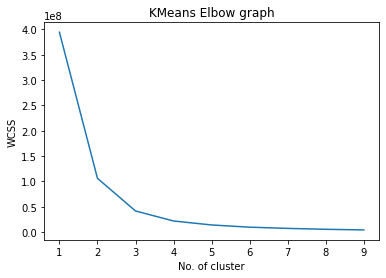

In [16]:
wcss=[]     # within cluster sum of squares
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('KMeans Elbow graph')
plt.xlabel('No. of cluster')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0) 
y_kmeans=kmeans.fit_predict(X)

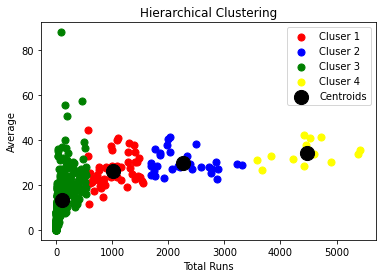

In [18]:
#Visualiz the Cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=50,c='red',label='Cluser 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=50,c='blue',label='Cluser 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=50,c='green',label='Cluser 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=50,c='yellow',label='Cluser 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('Hierarchical Clustering')
plt.xlabel('Total Runs')
plt.ylabel('Average')
plt.legend()